# Oluwadabira Omotoso

## How has the gender gap in literacy changed?

Based on the ongoing discussion about equality, I would like to see if there is a gender gap in literacy rates and how that has changed over time. Analysing this also reveals whether or not we are progressing towards equality.

To answer my research question, I plan to use some kind of chart that can show the disparity that existed between men and women over a certain period. Furthermore, I would like to explore the potential disparities in the literacy rate between men and women among the different continents. Additionally, I would calculate the mean when collating the data for men and women for each continent and the years chosen.

**Additional research questions:**
- Concerning certain regions, which gender is known to have a higher literacy rate?
- Does religion play a role in the literacy rate? Is there a particular gender that is more educated?
- What is the effect of wealth on literacy rate among a particular gender?
- As the level of education rises, has there been a decreased trend of literacy rate for a certain gender?

My analysis plan is answering the additional research questions to get an indepth analysis of the gender gap in literacy rate. I feel answering the additional research questions gives reason for me to come up with an accurate conclusion. 

## Loaded raw dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joypy
from joypy import joyplot
from pandas.api.types import CategoricalDtype
import plotly.express as px
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )

## Columns in the dataset that I want to do EDA on:

In [1]:
import project_functions3

In [2]:
df=project_functions3.load_and_process("../data/raw/dataset_raw.csv",dtype={"Region": "oject", "Ethnicity": "object","Religion": "object","Language": "object"})

#### Sub Question 1: Concerning certain regions, which gender is known to have a higher literacy rate?

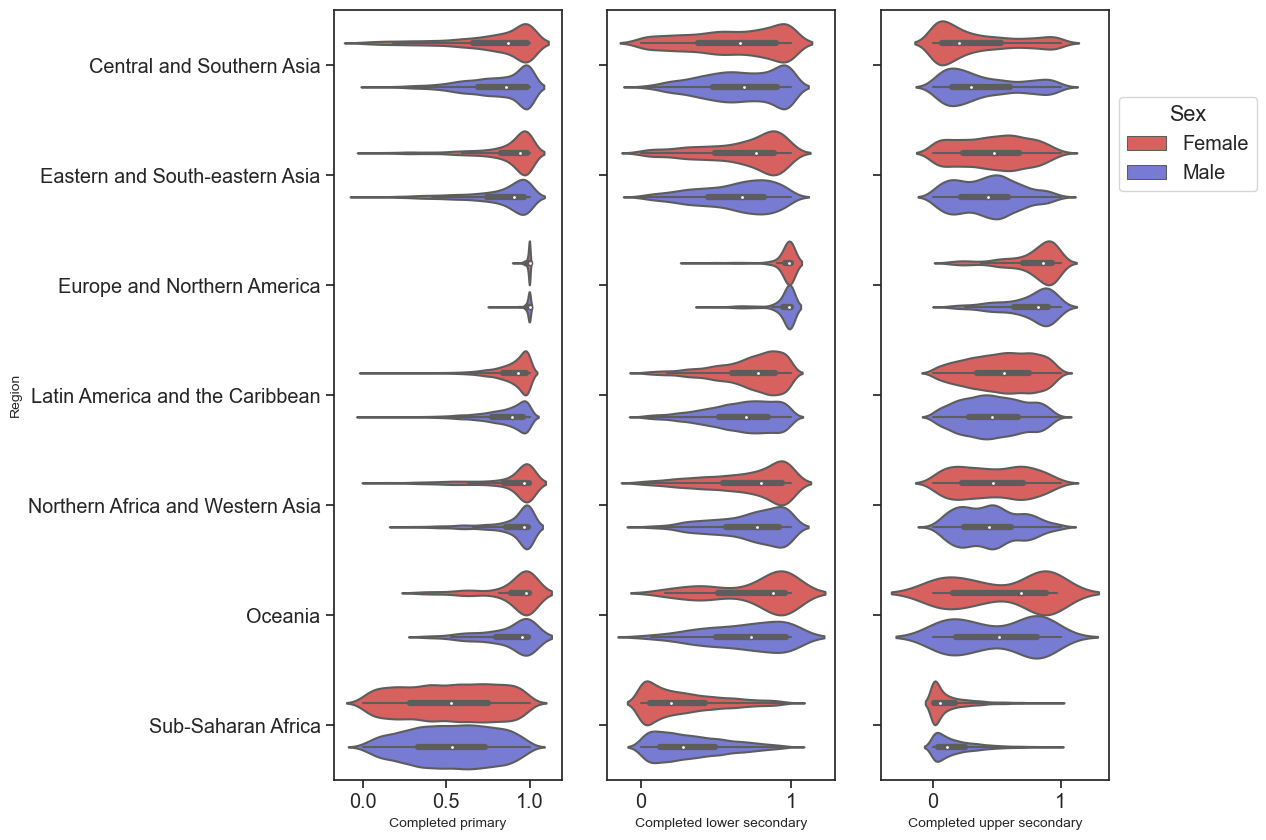

<Figure size 1000x1000 with 0 Axes>

In [7]:
project_functions3.region(df)

From the dataset plotted above, the purpose of the various boxplots is to compare if there is a significant gap in the gender that completed primary school, lower secondary and upper secondary. The values in the x axis reflect a percentage.
- For Central and Southern Asia, the male and female attendance started off the same but there was a significant drop of female attendance when it came to completing upper secondary.
- For Subsaharan Africa, overall there was a significant drop in completing upper secondary. However, when comparing genders, the females that completed lower secondary school was much lower than the male.
- For Europe and North America, there was no significant change for both genders. However, for completion of upper secondary, the completion of males in secondary reduced.
- For Northern Africa, the male attendance dropped in lower secondary and uppersecondary
- For Latin America and the Carribean, the male attendance dropped as it went from primary to upper secondary
- For Oceania, there was a significant difference in the medians for completion of lower secondary and upper secondary
- For Eastern and South-eastern Asia, there was not wide gap in the medians for completion of each level. However, it was noticable the male completion reduced compared to females.

#### Sub Question 2: Does religion play a role in the literacy rate? Is there a particular gender that is more educated?

<Figure size 640x480 with 0 Axes>

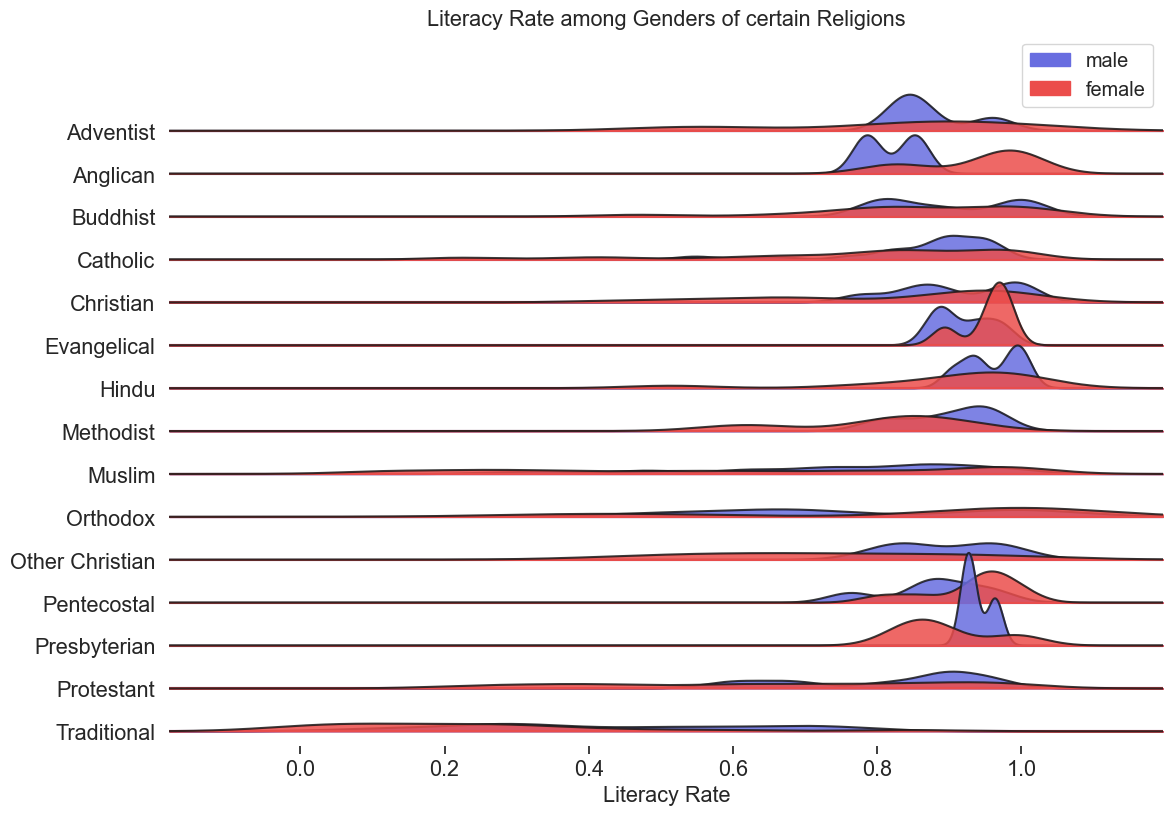

In [3]:
result_df= project_functions3.wrangling2(df)
project_functions3.religion(result_df)

According to the plot, there are differences between male and female literacy rates with regard to different religions. According to our data on Muslims, for instance, the literacy rate of females ranged from 0% to 100%, but a greater proportion of Muslim women fell within the range of 80% to 100%. The Muslim men's literacy rate ranged from 60% to 80%. The plot above leads us to the conclusion that we cannot say with certainty if there are elements that cause religion to directly impact the literacy rate. However, this plot has demonstrated the disparity in literacy rates between genders and various religions. There were disparities or a certain higher literacy rate in a certain religion, but religion might not directly affect this disparity.

#### Sub Question 3: What is the effect of wealth on literacy rate among a particular gender?

In [5]:
# pivot = df.pivot_table(index="Wealth", columns="Sex", values="literacy_1524_m")
# project_functions3.bar(pivot)

In [4]:
# pivot = df.pivot_table(index="Wealth", columns="Sex", values="literacy_1524_m").reset_index()
# melted = pivot.melt(id_vars=['Wealth'], value_vars=['Female', 'Male'], var_name='sex', value_name='literacy_rate')
# project_functions3.print_radial(melted)

<h2 style="text-align: center;"> Analysis of gender gap in Literacy through the Wealth</h2>
<p style="text-align: center;"> Quintile 1: Poorest - Quintile 5: Richest</p>

| | |
| ----------- | ----------- |
| <img src="../images/plot.png" width="5000" height="5000"> |<img src="../images/plot1.png" width="5000" height="5000">  |

Looking at this bar chart which contains the mean literacy rate of concerning certain wealth levels and a particular gender, there are some changes but not that significant meaning that wealth has no significant effect on a particular gender's literacy rate. Looking at all these quintiles which range from poorest to richest, the noticeable trend is that the females generally have a lower literacy rate compared to the males.

The females literacy rate might be much lower in the quintile 1 and quintile 2 because of societal factors such as the belief the woman should work at home and take care of the household or the idea that women should take up more nurturing roles where education might not be needed. Quintile 4 and Quintile 5 has a higher literacy rate for the women. The reason could be that education may be more valued in higher socioeconomic classes.

***could cite a study or add extra data to back up conclusion***

#### General correlation of Gender and literacy rate all over the world

In [5]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# text=("Literacy_Rate Literacy_Rate Literacy_Rate Literacy_Rate Gender Gender Wealth Religion Literacy_Rate Literacy_Rate Wealth Religion Gender Gender Primary Secondary")

# Create the wordcloud object
# wordcloud = WordCloud(width=480, height=480, colormap="brg",background_color="white").generate(text)

# Display the generated image:
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.margins(x=0, y=0)
# plt.savefig("cloud.png", bbox_inches = 'tight')
# plt.show()


|  | |
| ----------- | ----------- |
| ![](../images/cloud.png) | From the sub questions above there is a gender gap in literacy rate. In this analysis, the gender gap varies for different disparities considered. For example, when wealth was considered, for each quintile, the males had a higher literacy rate. From the analysis there might be other factors that create this gap. In evaluating the factors, a new dataframe that focuses of some factors affecting literacy rate will be introduced. |